Bernoulli Random Trials

# Geometric distribution

The geometrid distribution is either of two discrete probability distributions:

- The probability of the number X of Bernoulli trials needed to get one success. {1,2,3,...}
- The probability distribution of the number Y = X - 1 or failures before the first success. {0,1,2,3,..}

The geometric distribution gives the probability that the first occurrence of success requires $n$ independent trials, each with success probability $p$. If the probability of success is $p$, then the probability that the kth trial is the first success is $$Pr(X=n) = (1-p)^{n-1}p$$

For modeling the number of failures until the first success:  $$Pr(Y = n) = (1-p)^n p$$

## On the titanic data...

Let us model the attempt of parents to ensure a boat to escape for her child as a random bernoulli trial, where success is ensuring the boat and failure is not.

For simplicity, let us assume the probability of success p ressembles the probability of a child to survive, calculated through the proportion of children who survived in the tragedy.

Still, to make things interesting, let us compare the geometric distributions for children who travelled in first class against the ones who travelled in third class.

(Also let us assume factors such as the number of siblings and number of parents do not affect the distribution)

In [7]:
#Import useful packages
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas

def plot_geometric_distribution(p_success,nth_trials):
    p = p_success #a probability of success
    n = np.linspace(1,nth_trials,nth_trials) #trials... an array for modeling each case... but until nth_trial

    geometric_distribution = stats.geom.pmf(n,p)

    plt.bar(n,geometric_distribution)
    plt.title('Geometric distribution')
    plt.xlabel('n')
    plt.ylabel('P')
    plt.show()

#This below are wrong
# print('Mean = ', np.mean(geometric_distribution))
# print('SD = ', np.std(geometric_distribution))
#print(n)

#print(geometric_distribution)



In [19]:
#Import data
filename = '../Data/train.csv'
titanic_dataframe = pandas.read_csv(filename)
titanic_dataframe.head()

sample_size = len(titanic_dataframe)
first_class_children_total = len(titanic_dataframe.loc[(titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == 1)])
first_class_children_proportion = first_class_children_total / sample_size

first_class_children_survivors_total = len(titanic_dataframe.loc[(titanic_dataframe['Survived'] == 1) & (titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == 1)])
first_class_children_survivors_proportion = first_class_children_survivors_total / sample_size

first_class_children_survival_probability = first_class_children_survivors_proportion / first_class_children_proportion

print(first_class_children_survival_probability)


def C_class_children_survival_probability(C_class):
    C_class_children_total = len(titanic_dataframe.loc[(titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == C_class)])
    C_class_children_proportion = C_class_children_total / sample_size

    C_class_children_survivors_total = len(titanic_dataframe.loc[(titanic_dataframe['Survived'] == 1) & (titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == C_class)])
    C_class_children_survivors_proportion = C_class_children_survivors_total / sample_size

    C_class_children_survival_probability = C_class_children_survivors_proportion / C_class_children_proportion
    
    return C_class_children_survival_probability


print(C_class_children_survival_probability(1))
print(C_class_children_survival_probability(2))
print(C_class_children_survival_probability(3))
    


0.7499999999999999
0.7499999999999999
1.0
0.41666666666666663


In [29]:
#titanic_dataframe.loc[(titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == 3)]

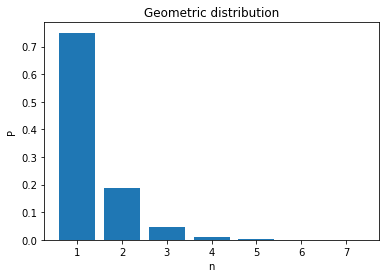

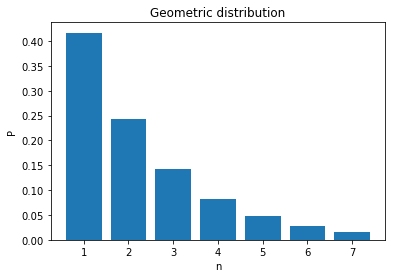

In [38]:
plot_geometric_distribution(C_class_children_survival_probability(1),7)
#plot_geometric_distribution(C_class_children_survival_probability(2),15)
plot_geometric_distribution(C_class_children_survival_probability(3),7)

#### Let's try a cooler visualization of this geometric distributions

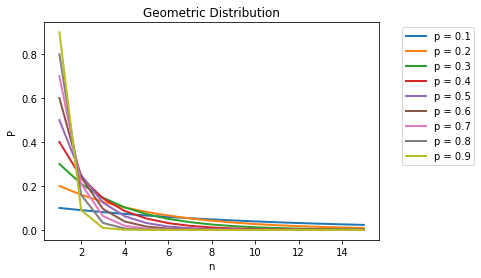

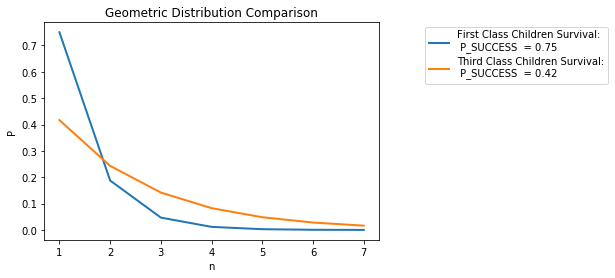

In [64]:
for p in np.linspace(0.1,0.9,9):
    n = np.linspace(1,15,15)
    p = round(p,1)
    distribution = stats.geom.pmf(n,p)
    plt.plot(n,distribution,linewidth=2,label='p = {p}'.format(p=p))


plt.title('Geometric Distribution')
plt.legend(bbox_to_anchor = (1.3,1))
plt.xlabel('n')
plt.ylabel('P')
plt.show()

def plot_geometric_distributions_together(title_a,p_a,title_b, p_b, nth_trials):
        n = np.linspace(1,nth_trials,nth_trials)
        # distribution a
        distribution_a = stats.geom.pmf(n,p_a)
        plt.plot(n,distribution_a,linewidth=2,label='{title_a}:\n P_SUCCESS  = {p_a}'.format(title_a = title_a,p_a=round(p_a,2)))
        # distribution b
        distribution_b = stats.geom.pmf(n,p_b)
        plt.plot(n,distribution_b,linewidth=2,label='{title_b}:\n P_SUCCESS  = {p_b}'.format(title_b = title_b, p_b=round(p_b,2)))
        
        
        plt.title('Geometric Distribution Comparison')
        plt.legend(bbox_to_anchor = (1.7,1))
        plt.xlabel('n')
        plt.ylabel('P')
        plt.show()
        
plot_geometric_distributions_together('First Class Children Survival', C_class_children_survival_probability(1), 'Third Class Children Survival', C_class_children_survival_probability(3), 7)

# Binomial distribution

Suppose the probability of a single trial being a success is p. Then the probability of observing exactly $k$ successes in $n$ independent trials is given by $$\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$$

1. If p is held constant, but n is changed,


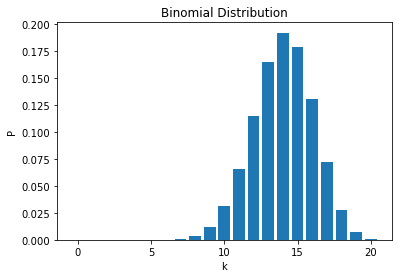

In [65]:
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

n = 20 # number of trials
p = 0.7 # probability of success
k = np.linspace(0,n,n+1) # number of successes... weird

binomial_distribution = stats.binom.pmf(k,n,p)

plt.bar(k, binomial_distribution)
plt.title('Binomial Distribution')
plt.xlabel('k')
plt.ylabel('P')
plt.show()

# This below is wrong
#print("Mean = ", np.mean(binomial_distribution))
#print("SD = ", np.std(binomial_distribution))

## On the Titanic Data...

Same context, but now the questions is:

- A parent may have more than one children, so out of nth trials, how many would a parent being able to ensure an escape boat for one of their children?
- How many attemps are necessary for achieving a probability above 50% of ensuring an escape boat for three children.
    - Assume we may model trials as independent bernoulli random trials, where ensuring an escape boat for three children may be thought as observing exactly k successes in n independent trials. We look for the n that would make p = 50% when k = 3.

(There are several strong assumptions being made here. The first is that it is assumming we can think of the trial stated as the same of... a child surviving)

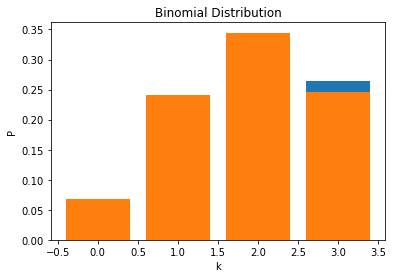

In [77]:
n = 5
k = np.linspace(0,3,3+1)
p = C_class_children_survival_probability(1)
distribution = stats.binom.pmf(k,n,p)
plt.bar(k, distribution, linewidth=2,label='n={n}'.format(n=n))

p = C_class_children_survival_probability(3)
distribution = stats.binom.pmf(k,n,p)
plt.bar(k, distribution, linewidth=2,label='n={n}'.format(n=n))


plt.title('Binomial Distribution')
#plt.legend(loc='best')
plt.xlabel('k')
plt.ylabel('P')
plt.show()

In [88]:
# probability of observing k = 3 successes in 5 independent trials
# First class
from scipy.special import comb
n = 7
k = 3
p = C_class_children_survival_probability(1)
print(comb(n, k) * p**k * (1-p)**(n-k))

n = 7
p = C_class_children_survival_probability(3)
print(comb(n, k) * p**k * (1-p)**(n-k))

0.0576782226563
0.293157827816


In [136]:
p = 0
p_success = C_class_children_survival_probability(1)
n = 7
for k in range(3,n+1):
    p += comb(n, k) * p_success**k * (1-p_success)**(n-k)
    
print(p)

def n_for_min_successes_k_for_min_p(p_success,k_minimum):
    n = 0
    while(True):
        p = 0
        for k in range(3,n+1):
            p += comb(n, k) * p_success**k * (1-p_success)**(n-k)
        if p < 0.95:
            n += 1
        else:
            return n

print(n_for_min_successes_k_for_min_p(C_class_children_survival_probability(1),3))   
print(n_for_min_successes_k_for_min_p(C_class_children_survival_probability(3),3))   


        
        
    

0.987121582031
6
13


In [122]:
p = 0
p_success = C_class_children_survival_probability(3)
n = 15
for k in range(3,n+1):
    p += comb(n, k) * p_success**k * (1-p_success)**(n-k)
    
print(p)

0.979882682529
